# Identifier les colonnes qui contiennent une seule valeur
 - Les colonnes qui ont une seule observation ou valeur sont probablement inutiles pour la modélisation.
 - Lorsqu’un prédicteur contient une seule valeur, il est appelé prédicteur à variance nulle car il n’y a aucune variation affichée par le prédicteur.
    Ici, une valeur unique signifie que chaque ligne de cette colonne a la même valeur.
 - Vous pouvez détecter les lignes qui ont cette propriété en utilisant la fonction nunique() de Pandas qui indiquera  le nombre de valeurs uniques dans chaque colonne.

In [ ]:
import pandas as pd
import numpy as np
# charger le fichier oil-spill.csv
data =pd.read_csv("datasets/oil-spill.csv")
# data.head()


,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,...,2850,1000,763.16,135.46,3.73,0.6,33243.19,65.74,7.95,1.1
0,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
1,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
2,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
3,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
4,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1


In [6]:
# unique values
for i in data.columns:
    print(i,":",data[i].nunique())
    print("\n")

1 : 238


2558 : 296


1506.09 : 926


456.63 : 932


90 : 179


6395000 : 374


40.88 : 819


7.89 : 617


29780 : 560


0.19 : 57


214.7 : 576


0.21 : 59


0.26 : 73


0.49 : 107


0.1 : 53


0.4 : 91


99.59 : 892


32.19 : 809


1.84 : 169


0.16 : 53


0.2 : 68


87.65 : 9


0 : 1


0.47 : 92


132.78 : 9


-0.01 : 8


3.78 : 9


0.22 : 308


3.2 : 447


-3.71 : 391


-0.18 : 107


2.19 : 42


0.3 : 4


2.19.1 : 45


310 : 141


16110 : 110


0.5 : 3


138.68 : 757


89 : 9


69 : 9


2850 : 387


1000 : 219


763.16 : 643


135.46 : 648


3.73 : 499


0.6 : 2


33243.19 : 936


65.74 : 169


7.95 : 286


1.1 : 2




In [5]:
print(data.nunique(),"\n")

1           238
2558        296
1506.09     926
456.63      932
90          179
6395000     374
40.88       819
7.89        617
29780       560
0.19         57
214.7       576
0.21         59
0.26         73
0.49        107
0.1          53
0.4          91
99.59       892
32.19       809
1.84        169
0.16         53
0.2          68
87.65         9
0             1
0.47         92
132.78        9
-0.01         8
3.78          9
0.22        308
3.2         447
-3.71       391
-0.18       107
2.19         42
0.3           4
2.19.1       45
310         141
16110       110
0.5           3
138.68      757
89            9
69            9
2850        387
1000        219
763.16      643
135.46      648
3.73        499
0.6           2
33243.19    936
65.74       169
7.95        286
1.1           2
dtype: int64 



# Supprimer les colonnes qui contiennent une seule valeur
- Les colonnes sont relativement faciles à supprimer d'un  DataFrame Pandas.

- L'approche consiste à enregistrer toutes les colonnes qui ont une seule valeur unique, puis les supprimer en appelant la fonction drop()

In [9]:
# Supprimer les colonnes avec une seule valeur unique
counts= data.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
data= data.drop(data.columns[to_del],axis=1)

[22]


In [11]:
data.shape

(936, 49)

In [12]:
# On peut utiliser cette technique pour supprimer les colonnes avec une seule valeur unique
data = data.loc[:,data.apply(pd.Series.nunique) != 1]
data.shape

(936, 49)

In [10]:
data.columns

Index(['1', '2558', '1506.09', '456.63', '90', '6395000', '40.88', '7.89',
       '29780', '0.19', '214.7', '0.21', '0.26', '0.49', '0.1', '0.4', '99.59',
       '32.19', '1.84', '0.16', '0.2', '87.65', '0.47', '132.78', '-0.01',
       '3.78', '0.22', '3.2', '-3.71', '-0.18', '2.19', '0.3', '2.19.1', '310',
       '16110', '0.5', '138.68', '89', '69', '2850', '1000', '763.16',
       '135.46', '3.73', '0.6', '33243.19', '65.74', '7.95', '1.1'],
      dtype='object')

# Considérer les colonnes qui ont très peu de valeurs
- Dans la section précédente, nous avons vu que certaines colonnes de
l’exemple de jeu de données avaient très peu de valeurs.
- Par exemple, certaines colonnes n’avaient que 2, 4 et 9 valeurs uniques.
- En tant que tel, n’avoir que 2, 4 ou 9 valeurs numériques uniques dans une colonne peut être surprenant.
- Nous pouvons faire référence à ces colonnes ou prédicteurs comme des prédicteurs de variance proche de zéro, comme leur variance n’est pas nulle, mais un très petit nombre proche de zéro.

In [14]:
# calcul le pourcentage de chaque valeur unique pour chaque clonne
for i in range(data.shape[1]):
    num= data.iloc[:,i].nunique()
    pourcentage= float(num)/data.shape[0]
    print(data.columns[i],":",num,":",pourcentage)

1 : 238 : 0.25427350427350426
2558 : 296 : 0.3162393162393162
1506.09 : 926 : 0.9893162393162394
456.63 : 932 : 0.9957264957264957
90 : 179 : 0.19123931623931623
6395000 : 374 : 0.3995726495726496
40.88 : 819 : 0.875
7.89 : 617 : 0.6591880341880342
29780 : 560 : 0.5982905982905983
0.19 : 57 : 0.060897435897435896
214.7 : 576 : 0.6153846153846154
0.21 : 59 : 0.06303418803418803
0.26 : 73 : 0.07799145299145299
0.49 : 107 : 0.11431623931623931
0.1 : 53 : 0.056623931623931624
0.4 : 91 : 0.09722222222222222
99.59 : 892 : 0.9529914529914529
32.19 : 809 : 0.8643162393162394
1.84 : 169 : 0.18055555555555555
0.16 : 53 : 0.056623931623931624
0.2 : 68 : 0.07264957264957266
87.65 : 9 : 0.009615384615384616
0.47 : 92 : 0.09829059829059829
132.78 : 9 : 0.009615384615384616
-0.01 : 8 : 0.008547008547008548
3.78 : 9 : 0.009615384615384616
0.22 : 308 : 0.32905982905982906
3.2 : 447 : 0.4775641025641026
-3.71 : 391 : 0.41773504273504275
-0.18 : 107 : 0.11431623931623931
2.19 : 42 : 0.04487179487179487
0

In [15]:
#affiches les colones dont les valuers uniques sont inf a 1%
for i in range(data.shape[1]):
    num= data.iloc[:,i].nunique()
    pourcentage= float(num)/data.shape[0]
    if pourcentage < 0.01:
        print(data.columns[i],":",num,":",pourcentage)

87.65 : 9 : 0.009615384615384616
132.78 : 9 : 0.009615384615384616
-0.01 : 8 : 0.008547008547008548
3.78 : 9 : 0.009615384615384616
0.3 : 4 : 0.004273504273504274
0.5 : 3 : 0.003205128205128205
89 : 9 : 0.009615384615384616
69 : 9 : 0.009615384615384616
0.6 : 2 : 0.002136752136752137
1.1 : 2 : 0.002136752136752137


# Supprimer les  colonnes dont les valeurs uniques sont inférieures à 1% des lignes

In [16]:
#supprimes les colonnes dont les valeurs uniques sont inférieures à 1%
data = data.loc[:,data.apply(pd.Series.nunique)/data.shape[0] >= 0.01]

In [17]:
data.shape

(936, 39)

# Supprimez les colonnes qui ont une faible variance
  - **En calculant manuellement la variance de chaque colonne**
    - Rappelons que la variance est une statistique calculée sur une variable en tant que différence moyenne au carré des valeurs de l’échantillon par rapport à la moyenne.
    - La variance peut être utilisée comme un filtre pour identifier les colonnes à supprimer de l’ensemble de données. Une colonne qui a une seule valeur a une variance de 0.0, et une colonne qui a très peu de valeurs uniques peut avoir une petite variance.
  - **En utilisant la classe VarianceThreshold de la bibliothèque scikit-learn**
    - La classe VarianceThreshold de la bibliothèque scikit-learn prend en charge ce type de sélection de caractéristiques.
    - Une instance de la classe peut être créée et nous pouvons spécifier l’argument du seuil, qui a la valeur par défaut 0.0 pour éliminer les colonnes avec une seule valeur.
    - Elle peut ensuite être ajustée et appliquée à un ensemble de données en appelant la fonction fit_transform() pour créer une version transformée de l’ensemble de données où les colonnes dont la variance est inférieure au seuil ont été supprimées automatiquement.

In [20]:
#import varianceThreshold
from sklearn.feature_selection import VarianceThreshold
# define the transform
transform = VarianceThreshold()
#import data
data = pd.read_csv("datasets/oil-spill.csv")
# X = data[:, :-1]
# y= data[:,-1]

# print(X.shape, y.shape)


In [21]:
data.shape

(936, 50)

In [26]:
X=data.iloc[:, :-1]
y=data.iloc[:,-1]
print(X.shape, y.shape)

(936, 49) (936,)


In [27]:
# fit the transform
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(936, 48)


# Etendre cet exemple et voir ce qui se passe lorsque nous utilisons différents seuils. Nous pouvons définir une séquence de seuils de 0.0 à 0.5 avec un pas de 0.05, par exemple 0.0, 0.05, 0.1, etc.

In [ ]:
# for i in range(data.shape[1]):
#     num= data.iloc[:,i].nunique()
#     pourcentage= float(num)/data.shape[0]
#     if pourcentage < 0.01:
#         print(data.columns[i],":",num,":",pourcentage)

In [43]:
import matplotlib.pyplot as plt
# Définir les seuils de variance à tester


# Définir les seuils de variance à tester
thresholds = np.arange(0.0, 0.55, 0.05)

# Stocker les résultats
results = []

# Boucle sur les seuils
for t in thresholds:
    # Appliquer VarianceThreshold
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    
    # Nombre de colonnes restantes après transformation
    n_features = X_sel.shape[1]
    
    # Afficher le seuil et le nombre de colonnes restantes
    print(f'> Threshold = {t:.2f}, Features = {n_features}')
    results.append(n_features)
    
    # Si le seuil est supérieur à 0, afficher les colonnes supprimées
    if t > 0:
        # Identifier les colonnes supprimées
        deleted_columns = [data.columns[i] for i in range(X.shape[1]) if i not in transform.get_support(indices=True)]
        
        # Afficher les détails des colonnes supprimées
        for col in deleted_columns:
            unique_values = data[col].nunique()  # Nombre de valeurs uniques
            perc = (unique_values / data.shape[0]) * 100  # Pourcentage de valeurs uniques
            variance = data[col].var()  # Variance de la colonne
            print(f'Column: {col}, Unique Values: {unique_values}, Percentage des valeurs uniques: {perc:.2f}%, Variance: {variance:.6f}')
    
    print('=' * 50)  # Séparateur pour plus de clarté


> Threshold = 0.00, Features = 48
> Threshold = 0.05, Features = 37
Column: 0.19, Unique Values: 57, Percentage des valeurs uniques: 6.09%, Variance: 0.008165
Column: 0.21, Unique Values: 59, Percentage des valeurs uniques: 6.30%, Variance: 0.007774
Column: 0.26, Unique Values: 73, Percentage des valeurs uniques: 7.80%, Variance: 0.014748
Column: 0.49, Unique Values: 107, Percentage des valeurs uniques: 11.43%, Variance: 0.047078
Column: 0.1, Unique Values: 53, Percentage des valeurs uniques: 5.66%, Variance: 0.006880
Column: 0.4, Unique Values: 91, Percentage des valeurs uniques: 9.72%, Variance: 0.041935
Column: 0.16, Unique Values: 53, Percentage des valeurs uniques: 5.66%, Variance: 0.005688
Column: 0.2, Unique Values: 68, Percentage des valeurs uniques: 7.26%, Variance: 0.011105
Column: 0, Unique Values: 1, Percentage des valeurs uniques: 0.11%, Variance: 0.000000
Column: -0.18, Unique Values: 107, Percentage des valeurs uniques: 11.43%, Variance: 0.046474
Column: 0.3, Unique Valu

In [41]:
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print('>Threshold = %.2f, Features = %d' % (t, n_features))
    results.append(n_features)
    if t > 0:
        deleted_columns = [data.columns[i] for i in range(X.shape[1]) if i not in transform.get_support(indices=True)]
        for col in deleted_columns:
            unique_values = data[col].nunique()
            perc = unique_values /data.shape[0] * 100
            variance = data[col].var()
            print(f'Column: {col}, Unique Values: {unique_values}, Percentage: {perc:.2f}%, Variance: {variance:.6f}')

>Threshold = 0.00, Features = 48
>Threshold = 0.05, Features = 37
Column: 0.19, Unique Values: 57, Percentage: 6.09%, Variance: 0.008165
Column: 0.21, Unique Values: 59, Percentage: 6.30%, Variance: 0.007774
Column: 0.26, Unique Values: 73, Percentage: 7.80%, Variance: 0.014748
Column: 0.49, Unique Values: 107, Percentage: 11.43%, Variance: 0.047078
Column: 0.1, Unique Values: 53, Percentage: 5.66%, Variance: 0.006880
Column: 0.4, Unique Values: 91, Percentage: 9.72%, Variance: 0.041935
Column: 0.16, Unique Values: 53, Percentage: 5.66%, Variance: 0.005688
Column: 0.2, Unique Values: 68, Percentage: 7.26%, Variance: 0.011105
Column: 0, Unique Values: 1, Percentage: 0.11%, Variance: 0.000000
Column: -0.18, Unique Values: 107, Percentage: 11.43%, Variance: 0.046474
Column: 0.3, Unique Values: 4, Percentage: 0.43%, Variance: 0.002402
Column: 0.5, Unique Values: 3, Percentage: 0.32%, Variance: 0.000028
>Threshold = 0.10, Features = 36
Column: 0.19, Unique Values: 57, Percentage: 6.09%, Var

[48, 37, 36, 35, 35, 35, 35, 35, 35, 33, 31]


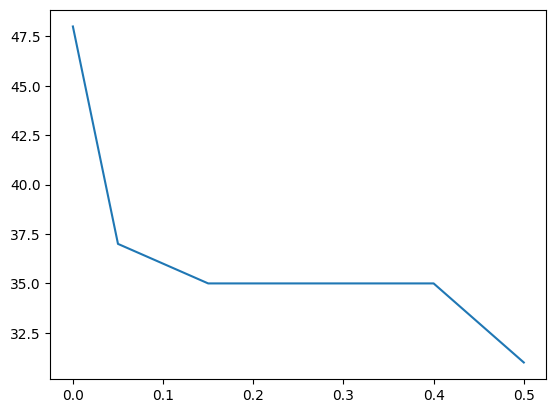

In [32]:
#import matplotlib.pyplot
print(results)
plt.plot(thresholds, results)


# Tracer les résultats de la comparaison entre le seuil de variance et le nombre de caractéristiques sélectionnées